# <u>Case Study</u>: Predicting Airbnb Superhost Status

#### Sergio Cornejo
#### April 20, 2022

Suppose that you have a spare room in your house (in Seattle) and you are considering advertising this room to guests on Airbnb. Airbnb superhosts are considered to be experienced hosts who provide a shining example for other hosts, and extraordinary experiences for their guests. Once a host reaches Superhost status, a superhost badge will automatically appear on their listing and profile to help guests identify them. You would like to assess your chances of being named a superhost with your property.

The following dataset is a sample (assume random) of available Airbnb listings in Seattle, WA. These listings were collected in January 2016, and filtered to just contain listings from the five most popular Seattlbe neighborhoods (for Airbnb listings) and just contain listings that are either in a house or apartment property.

This dataset contains the following variables.

**Listing Information**
The dataset contains the following information about the Airbnb *listing*:
* <u>price</u>: price of the listing (per night)(in US dollars)
* <u>review_scores_rating</u>: the average rating of the listing [0,100] (100 is the best)
* <u>number_of_reviews</u>: the number of reviews for the listing
* <u>security_deposit</u>: the security deposit required for the listing (in US dollars)
* <u>cleaning_fee</u>: the cleaning fee required for the listing (in US dollars)
* <u>neighborhood</u>: the neighborhood of Seattle the listing is located in
* <u>property_type</u>: is the listing in a 'House' or 'Apartment'
* <u>room_type</u>: is the listing a 'Entire home/apt', 'Private room', or 'Shared room'
* <u>accommodates</u>: how many guests will the listing accommodate
* <u>bathrooms</u>:how many bathrooms does the listing have
* <u>beds</u>: how many beds does the listing have

**Host Information**
The dataset also contains the following information about the *host* of the given Airbnb listing:
* <u>host_is_superhost</u>: is the host a "superhost": t=True, f=False
* <u>host_has_profile_pic</u>: does the host have a profile pic in their bio: t=True, f=False
* <u>host_response_time</u>: how fast will the host respond to requests (on average)
* <u>host_acceptance_rate</u>: what percent of booking requests will the host accept



### Imports

In [40]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import statsmodels.api as sm
import statsmodels.formula.api as smf

from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score

## 1. Data Processing and Cleaning

In [41]:
df=pd.read_csv('seattle_airbnb_listings_cleaned.csv')
df.head()

,price,review_scores_rating,number_of_reviews,security_deposit,cleaning_fee,neighborhood,property_type,room_type,accommodates,bathrooms,beds,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_has_profile_pic,host_identity_verified
0,300,100,24,500,95,Wallingford,House,Entire home/apt,5,1.5,3,within a few hours,1.0,1,t,t,t
1,149,96,11,300,105,Wallingford,Apartment,Entire home/apt,6,1.0,3,within an hour,1.0,1,f,t,t
2,95,95,79,150,40,Wallingford,Apartment,Entire home/apt,3,1.0,2,within an hour,1.0,1,f,t,t
3,105,100,13,500,50,Wallingford,House,Private room,2,2.0,1,within a few hours,1.0,1,t,t,t
4,140,99,30,250,65,Wallingford,House,Entire home/apt,2,1.0,1,within an hour,1.0,1,t,t,t


In [42]:
df.shape

(339, 17)

## 2. Associations with Super Host Status

In this analysis I will be building several logistic regression models. Each of these logistic regression models will predict the likelihood that a Seattle Airbnb host is a superhost.

To get a sense as to what explanatory variables to use in this model I will analyze the relationships between the **host_is_superhost** categorical variable and some of the other variables in the dataset.

### 2.1. Side-by-side boxplots

#### 2.1.1. Super Host Status and Price

The side-by-side boxplots is used to visualize the relationship between a host's listing price and their superhost status.

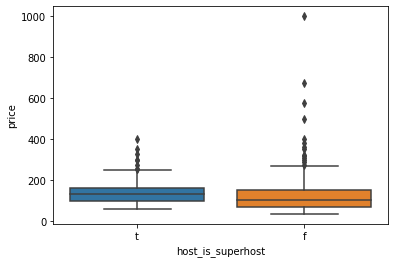

In [43]:
sns.boxplot(x='host_is_superhost', y='price', data=df)
plt.show()

#### 2.1.2. Super Host Status and Review Score's Rating

The side-by-side boxplots is used to visualize the relationship between a host's review score rating and their superhost status.

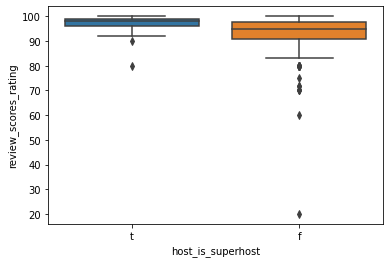

In [44]:
sns.boxplot(x='host_is_superhost', y='review_scores_rating', data=df)
plt.show()

#### 2.1.3. Super Host Status and Number of Reviews

The side-by-side boxplots is used to visualize the relationship between the number of reviews for a hosts listing and their superhost status.

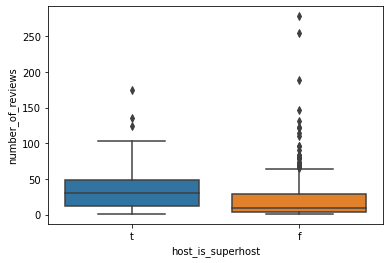

In [45]:
sns.boxplot(x='host_is_superhost', y='number_of_reviews', data=df)
plt.show()

### 2.2. Barplots

#### 2.2.1. Super Host Status and Neighborhood

The table below displays the following percentages:
* the percentage of Belltown property owners that are superhosts
* the percentage of Belltown property owners that are not superhosts
* the percentage of Broadway property owners that are superhosts
* the percentage of Broadway property owners that are not superhosts
* the percentage of Minor property owners that are superhosts
* the percentage of Minor property owners that are not superhosts
* the percentage of Fremont property owners that are superhosts
* the percentage of Fremont property owners that are not superhosts
* the percentage of Wallingford property owners that are superhosts
* the percentage of Wallingford property owners that are not superhosts

In [46]:
tmp=pd.crosstab(df['neighborhood'],df['host_is_superhost'], normalize='index')
tmp

host_is_superhost,f,t
neighborhood,,
Belltown,0.526316,0.473684
Broadway,0.808333,0.191667
Fremont,0.765957,0.234043
Minor,0.551020,0.448980
Wallingford,0.727273,0.272727


The barplot is used to visualize the relationship between a host's superhost status and the neighborhood that their property is located in. The barplot also displays the percentages from the above table.

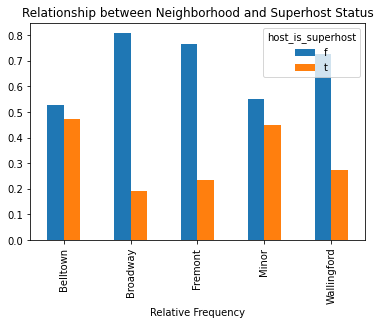

In [47]:
tmp.plot.bar()
plt.title('Relationship between Neighborhood and Superhost Status')
plt.xlabel('Relative Frequency')
plt.show()

#### 2.2.2 Interpretation

There appears to be a relationship between the superhost status of a host and the neighborhood that their property is located in this dataset. For instance the percentage of superhosts for each of the 5 neigbhorhoods are very different. Therefore, there is an an association in this dataset. In addition, the Belltown neighborshoods have the highest percentage of their hosts as superhosts (47%).

#### 2.2.3. Super Host Status and Property Type

The table below displays the following percentages:
* the percentage of house property owners that are superhosts
* the percentage of house property owners that are not superhosts
* the percentage of apartment property owners that are superhosts
* the percentage of apartment property owners that are not superhosts

In [48]:
tmp=pd.crosstab(df['property_type'],df['host_is_superhost'], normalize='index')
tmp

host_is_superhost,f,t
property_type,,
Apartment,0.675127,0.324873
House,0.739437,0.260563


The barplot is used to visualize the relationship between a host's superhost status and the property type. The barplot also displays the percentages from the above table.

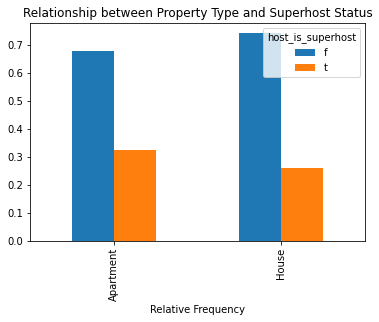

In [49]:
tmp.plot.bar()
plt.title('Relationship between Property Type and Superhost Status')
plt.xlabel('Relative Frequency')
plt.show()

#### 2.2.4 Interpretation

The neighborhood variable has a stronger association with superhost status. The likelihood that given neighborhood has a superhost listing is much more different across the five different neighborhoods.

## 3. Fitting and Interpreting Logistic Regression Model

The first step is to fit a logistic regression model that will predict the probability that a given Airbnb listing host **is a superhost** ie. **(y=1)**, given the following explanatory variables:
* listing price
* review scores rating
* number of reviews
* neighborhod
* property type

### 3.1. Fitting the model

In [50]:
df['y']=df['host_is_superhost'].map({'t': 1, 'f': 0})
df.head()

,price,review_scores_rating,number_of_reviews,security_deposit,cleaning_fee,neighborhood,property_type,room_type,accommodates,bathrooms,beds,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_has_profile_pic,host_identity_verified,y
0,300,100,24,500,95,Wallingford,House,Entire home/apt,5,1.5,3,within a few hours,1.0,1,t,t,t,1
1,149,96,11,300,105,Wallingford,Apartment,Entire home/apt,6,1.0,3,within an hour,1.0,1,f,t,t,0
2,95,95,79,150,40,Wallingford,Apartment,Entire home/apt,3,1.0,2,within an hour,1.0,1,f,t,t,0
3,105,100,13,500,50,Wallingford,House,Private room,2,2.0,1,within a few hours,1.0,1,t,t,t,1
4,140,99,30,250,65,Wallingford,House,Entire home/apt,2,1.0,1,within an hour,1.0,1,t,t,t,1


In [51]:
mod1=smf.logit('y~price+review_scores_rating+number_of_reviews+neighborhood+property_type', data=df).fit()
mod1.summary()

Optimization terminated successfully.
         Current function value: 0.490114
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  339
Model:                          Logit   Df Residuals:                      330
Method:                           MLE   Df Model:                            8
Date:                Mon, 12 Sep 2022   Pseudo R-squ.:                  0.1954
Time:                        17:40:50   Log-Likelihood:                -166.15
converged:                       True   LL-Null:                       -206.49
Covariance Type:            nonrobust   LLR p-value:                 3.574e-14
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                     -27.8074      5.148     -5.402      0.000     -37.896     -17.718
neighborhood[T.Broadway]       -1.1046      0.393     -2.813      0.005      -1.874      -0.335
neighborhood[T.Fremont]        -0.7215      0.492     -1.467      0.142      -1.685       0.242
neighborhood[T.Minor]           0.0272      0.490      0.056      0.956      -0.933       0.987
neighborhood[T.Wallingford]    -0.4037      0.472     -0.855      0.392      -1.329       0.521
property_type[T.House]         -0.3405      0.338     -1.009      0.313      -1.002       0.321
price                           0.0013      0.001      0.924      0.356      -0.001       0.004
review_scores_rating            0.2792      0.052      5.333      0.000       0.177       0.382
number_of_reviews               0.0182      0.004      4.470      0.000       0.010       0.026
===============================================================================================
"""

### 3.2. Logistic Regression Model Output

$ln(\frac{\hat{p}}{1-\hat{p}}) = -27.8074 -1.1046neighborhood[Broadway] -0.7215neighborhood[Fremont] +0.0272neighborhood[Minor] -0.4037neighborhood[Wallingford] -0.3405propertytype[house] +0.0013price+ 0.2792reviewscoresrating+ 0.0182numberofreviews$

### 3.3. Intercept Interpretation

The following calculation: $e^{\hat{\beta}_0}$

In [52]:
np.exp(-27.8074)

8.383003045266744e-13

The **odds** that a host with a listing in Belltown that is an apartment that costs 0 dollars, and has a review score of 0 and 0 reviews is **a superhost** is expected to be $8.383\times 10^{-13}$, on average.
* the odds that this person is a superhost is $8.383\times 10^{-13}$ to 1.
* the odds that this person is a superhost is 8383 to 10,000,000,000,000,000

### 3.4. Numerical Explanatory Variable Slope Interpretation

The following calculation: $e^{\hat{\beta}_i}$

In [53]:
np.exp(0.0013)

1.0013008453662857

All else held equal, if we were to increase the listing price of an Airbnb by 1 dollar, then we would expect the odds of a host being a superhost to increase by a multiple of 1.0013, on average.

### 3.5. Indicator Variable Slope Interpretation

$\hat{\beta}_j$ is the slope that corresponds to the property_type[HOUSE] indicator variable. The following calculation: $e^{\hat{\beta}_j}$

In [54]:
np.exp(-.3405)

0.711414526557692

All else held equal, we would expect the odds that the host of a house listing is a superhost to be lower by a factor of 0.7114 than the odds that the host of an apartment listing are a superhost, on average.

## 4.Conducting Inference on the Slopes of the Logistic Regression Model

We would like to conduct inference on the **number of reviews slope** in the population logistic regression model that corresponds to our model.  We would also like to conduct inference on the **odds multiplier for number of reviews** in the population logistic regression model that corresponds to our model.


### 4.1. Conditions for Inference

Conditions for conducting inference on the logistic regression population slopes below.

#### <u>Condition 1</u>: Independence of Observations Condition

a. [MET] The sample of Airbnb listings is randomly sampled from the population of ALL Seattle house/apartment Airbnb listings from the top 5 neighborhoods in January 2016.

b. [MET] $n=339<10$% of the population of ALL house/apartment Seattle Airbnb listings from the top 5 neighborhoods in January 2016.

This condition is met because (a) and (b) are met.

#### <u>Condition 2</u>: Linearity Condition

We have 3 numerical explanatory variables. So let's fit a logistic regression curve for each numerical explanatory variable and our 0/1 response variable y.

We do see a *slight* S-Shape for the price and number_of_reviews variables. But we do not see an S-shape for the review_scores_rating.

Therefore, because we do not see S-shapes for the simple logistic regression curves for all 3 numerical explanatory variables, then this condition may not be met.


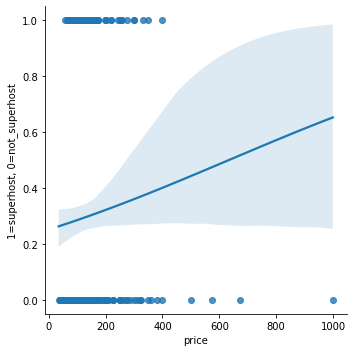

In [55]:
sns.lmplot(x="price", y='y',data=df, logistic=True)
plt.ylabel('1=superhost, 0=not_superhost')
plt.show()

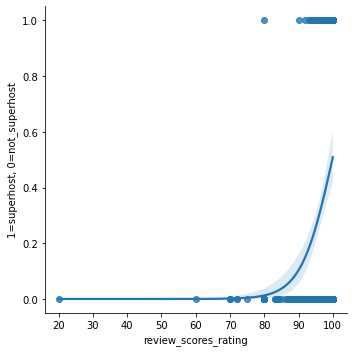

In [56]:
sns.lmplot(x="review_scores_rating", y='y',data=df, logistic=True)
plt.ylabel('1=superhost, 0=not_superhost')
plt.show()

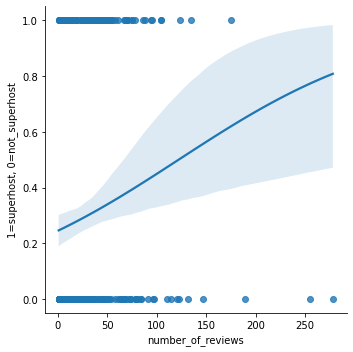

In [57]:
sns.lmplot(x="number_of_reviews", y='y',data=df, logistic=True)
plt.ylabel('1=superhost, 0=not_superhost')
plt.show()

#### <u>Condition 3</u>: No Multi-Collinearity Condition

We do not see a strong linear relationship between any of the numerical explanatory variables. Thus this condition is met.

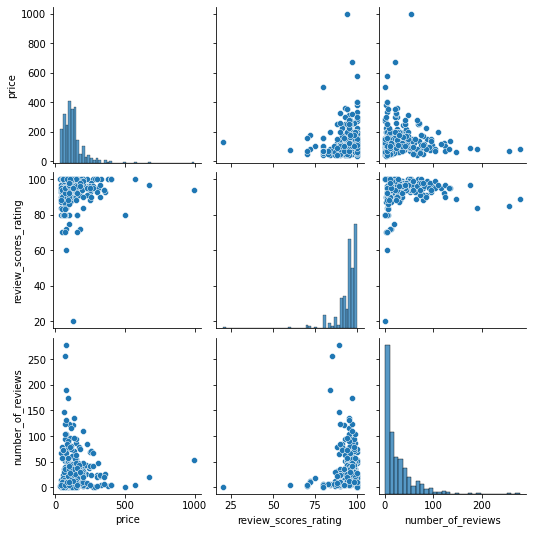

In [58]:
sns.pairplot(df[['price', 'review_scores_rating', 'number_of_reviews']])
plt.show()

In [59]:
df[['price', 'review_scores_rating', 'number_of_reviews']].corr()

,price,review_scores_rating,number_of_reviews
price,1.000000,0.094255,-0.034023
review_scores_rating,0.094255,1.000000,0.012705
number_of_reviews,-0.034023,0.012705,1.000000


### 4.2. 99% Confidence Intervals

#### 4.2.1. Confidence Interval for Slope

The following is a 99% confidence interval for the **number_of_reviews** slope (ie. a $\beta_i$) in the population logistic regression model that corresponds to our model.

Below is the point estimate and the standard error for these values in the table.

In [60]:
mod1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  339
Model:                          Logit   Df Residuals:                      330
Method:                           MLE   Df Model:                            8
Date:                Mon, 12 Sep 2022   Pseudo R-squ.:                  0.1954
Time:                        17:40:57   Log-Likelihood:                -166.15
converged:                       True   LL-Null:                       -206.49
Covariance Type:            nonrobust   LLR p-value:                 3.574e-14
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                     -27.8074      5.148     -5.402      0.000     -37.896     -17.718
neighborhood[T.Broadway]       -1.1046      0.393     -2.813      0.005      -1.874      -0.335
neighborhood[T.Fremont]        -0.7215      0.492     -1.467      0.142      -1.685       0.242
neighborhood[T.Minor]           0.0272      0.490      0.056      0.956      -0.933       0.987
neighborhood[T.Wallingford]    -0.4037      0.472     -0.855      0.392      -1.329       0.521
property_type[T.House]         -0.3405      0.338     -1.009      0.313      -1.002       0.321
price                           0.0013      0.001      0.924      0.356      -0.001       0.004
review_scores_rating            0.2792      0.052      5.333      0.000       0.177       0.382
number_of_reviews               0.0182      0.004      4.470      0.000       0.010       0.026
===============================================================================================
"""

In [61]:
point_estimate = 0.0182
standard_error = 0.004

Next is the critical value for this confidence interval. This is the positive z-score $z^*$ that encapsulates the confidence level of 0.99 between  $-z^*$ and  $z^*$ under the standard normal curve. 

In [62]:
from scipy.stats import norm
critical_value=norm.ppf(0.995)
critical_value

2.5758293035489004

In [63]:
lower_bound = point_estimate - critical_value*standard_error
upper_bound = point_estimate + critical_value*standard_error
print(lower_bound, upper_bound)

0.0078966827858044 0.028503317214195602


#### 4.2.2. Slope Confidence Interval Explanation

We are 99% confident that the population slope that corresponds to number_of_reviews in the corresponding population logistic regression model is between 0.0079 and 0.0285.

#### 4.2.3. Confidence Interval for the Odds Multiplier

The following is a 99% confidence interval for the **odds multiplier for number_of_reviews** in the population logistic regression model that corresponds to our model.

If $\beta_i$ is the slope for number_of_reviews in the population logistic regression model, then the odds multiplier for number_of_reviews in the population logistic regression model is $e^{\beta_i}$. Because we know the 99% confidence interval for $\beta_i$, the confidence interval for $e^{\beta_i}$ is found by exponentiating the lower and upper bounds of this confidence interval.

In [64]:
odds_mult_lower_bound = np.exp(lower_bound)
odds_mult_upper_bound = np.exp(upper_bound)
print(odds_mult_lower_bound, odds_mult_upper_bound)

1.0079279438172866 1.0289134239550788


#### 4.2.4. Odds Multiplier Confidence Interval Explanation

We are 99% confident that the odds multiplier for number_of_reviews in the corresponding population logistic regression model is between 1.0079 and 1.029.

### 4.3. Hypothesis Testing for the Population Slope

The next step is to determine if there is sufficient evidence to suggest that there is an association between superhost status and the number of reviews that the host's listing has for the hosts of ALL Seattle Airbnb listings from the top 5 neighborhoods.

To help us test this association, first we would like to test if we have enough evidence to suggest the slope for number_of_reviews is non-zero in the population model.

#### 4.3.1. Hypotheses

$H_0: \beta_7=0$

$H_A: \beta_7\neq 0$

$\beta_7$ is the slope that corresponds to number_of_reviews in the population model

#### 4.3.2. Test Statistic

Use the summary output table to calculate the test statistic for this test **by hand**. You can use the summary output table to check your work, but it may be a bit different due to rounding errors.

In [65]:
mod1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  339
Model:                          Logit   Df Residuals:                      330
Method:                           MLE   Df Model:                            8
Date:                Mon, 12 Sep 2022   Pseudo R-squ.:                  0.1954
Time:                        17:40:58   Log-Likelihood:                -166.15
converged:                       True   LL-Null:                       -206.49
Covariance Type:            nonrobust   LLR p-value:                 3.574e-14
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                     -27.8074      5.148     -5.402      0.000     -37.896     -17.718
neighborhood[T.Broadway]       -1.1046      0.393     -2.813      0.005      -1.874      -0.335
neighborhood[T.Fremont]        -0.7215      0.492     -1.467      0.142      -1.685       0.242
neighborhood[T.Minor]           0.0272      0.490      0.056      0.956      -0.933       0.987
neighborhood[T.Wallingford]    -0.4037      0.472     -0.855      0.392      -1.329       0.521
property_type[T.House]         -0.3405      0.338     -1.009      0.313      -1.002       0.321
price                           0.0013      0.001      0.924      0.356      -0.001       0.004
review_scores_rating            0.2792      0.052      5.333      0.000       0.177       0.382
number_of_reviews               0.0182      0.004      4.470      0.000       0.010       0.026
===============================================================================================
"""

The z-statistic for the number_of_reviews slope according to the above summary is 4.47.

In [66]:
test_statistic = 4.47

#### 4.3.3. p-value

The p-value calculated manually:

In [67]:
pvalue = 2*(1- norm.cdf(np.abs(test_statistic)))
pvalue

7.821959720599736e-06

#### 4.3.4. Conclusions with a p-value

Because $p-value=7.82\times 10^{-6} < \alpha=0.01$, we reject the null hypothesis. Thus there is sufficient evidence to suggest that the slope for review_scores_rating is non-zero in the population logistic regression model.

#### 4.3.5. Conclusions with a confidence interval

Because the null value, $\beta_7=0$ is not inside the confidence interval for $\beta_7$, we reject the null hypothesis. Thus there is sufficient evidence to suggest that the slope for number of reviews is non-zero in the population logistic regression model.

### 4.5. Summarization

If $\beta_7\neq 0$, then we can say that there is an association between superhost status and the number of reviews that the host's listing has for ALL Seattle Airbnb listings from the top 5 neighborhoods.

## 5. Model Prediction

### 5.1. Log odds prediction

Log odds prediction that an Airbnb host of a \$200/night house in the Belltown neighborhood with 20 reviews and a review scores rating of 95 is **a super host**.

In [68]:
log_odds = -27.8074 -1.1046*0 -0.7215*0 +0.0272*0 -0.4037*0 -0.3405*1 +0.0013*200+ 0.2792*95+ 0.0182*20
log_odds

-0.9998999999999975

### 5.2. Odds prediction

Log odds prediction that an Airbnb host of a \$200/night house in the Belltown neighborhood with 20 reviews and a review scores rating of 95 is **a super host**.

In [69]:
odds = np.exp(log_odds)
odds

0.3679162309550189

The odds that an Airbnb host of a \$200/night house in the Belltown neighborhood with 20 reviews and a review scores rating of 95 is **a super host**.* are 37 to 100.

### 5.3. Probability Prediction

The **probability** that an Airbnb host of a \$200/night house in the Belltown neighborhood with 20 reviews and a review scores rating of 95 is **a super host**.

If we use the "numerical odds" that the host is a superhost (ie. $odds=0.3679$), then we can use the equation

$p=\frac{odds}{1+odds}=\frac{0.3679}{1+0.3679} = 0.269$

In [70]:
#Using Python
prob = odds/(1+odds)
prob

0.26896108301760263

Therefore, the probability that they are a superhost is $0.27$.

## 6. Interaction

### 6.1. Number of Reviews vs. Superhost Status by Property Type
The scatterplot displays the super host status response variable with values that are either 0 or 1. It also displays the number_of_reviews variable and color coded points by property type. Finally, it displays a logistic regression curve to each set of these points (ie. a logistic regression curve for apartments and a logistic regression curve for houses). 

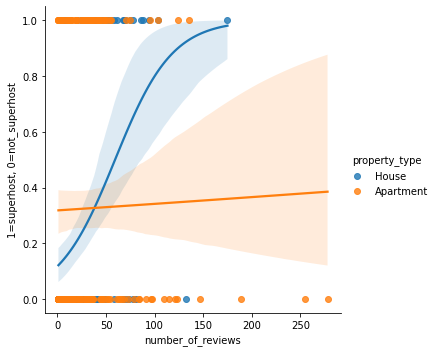

In [71]:
sns.lmplot(x="number_of_reviews", y='y',data=df, hue='property_type', logistic=True)
plt.ylabel('1=superhost, 0=not_superhost')
plt.show()

### 6.2. Interaction Effect

There is an interaction between property type and number of reviews when predicting the superhost status of an airbnb host in this data because the logistic regression curve "stretch" is different for these two curves.

### 6.3. New Logistic Regression Model with Interaction Term

New logistic regression model that will predict the probability that a given Airbnb listing host **is a superhost** ie. **(y=1)**, given the following explanatory variables:
* listing price
* review scores rating
* number of reviews
* neighborhod
* property type
* interaction between property type and number of reviews

In [72]:
mod2=smf.logit('y~price+review_scores_rating+number_of_reviews+neighborhood+property_type+property_type*number_of_reviews', data=df).fit()
mod2.summary()

Optimization terminated successfully.
         Current function value: 0.476188
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  339
Model:                          Logit   Df Residuals:                      329
Method:                           MLE   Df Model:                            9
Date:                Mon, 12 Sep 2022   Pseudo R-squ.:                  0.2182
Time:                        17:41:01   Log-Likelihood:                -161.43
converged:                       True   LL-Null:                       -206.49
Covariance Type:            nonrobust   LLR p-value:                 1.542e-15
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
Intercept                                  -25.3202      5.221     -4.850      0.000     -35.553     -15.088
neighborhood[T.Broadway]                    -1.0606      0.391     -2.714      0.007      -1.827      -0.295
neighborhood[T.Fremont]                     -0.7265      0.494     -1.470      0.141      -1.695       0.242
neighborhood[T.Minor]                        0.2143      0.501      0.428      0.669      -0.768       1.197
neighborhood[T.Wallingford]                 -0.3108      0.476     -0.653      0.514      -1.244       0.622
property_type[T.House]                      -1.2670      0.474     -2.674      0.008      -2.196      -0.338
price                                        0.0020      0.002      1.320      0.187      -0.001       0.005
review_scores_rating                         0.2546      0.053      4.793      0.000       0.151       0.359
number_of_reviews                            0.0109      0.005      2.251      0.024       0.001       0.020
property_type[T.House]:number_of_reviews     0.0274      0.009      2.888      0.004       0.009       0.046
============================================================================================================
"""

### 6.4. Fit the Model


$ln(\frac{\hat{p}}{1-\hat{p}}) = -25.3202 -1.0606neighborhood[Broadway] -0.7265	neighborhood[Fremont] +0.2143	neighborhood[Minor] -0.3108neighborhood[Wallingford] -1.2670propertytype[house] +0.0020price+ 0.2546reviewscoresrating+ 0.0109numberofreviews + 0.0274property\_type[T.House]*number\_of\_reviews$

### 6.5. Interaction Effect in the Population Model

There is sufficient evidence to suggest that there is an interaction effect between property type and number of reviews in the corresponding population model.

If $\beta_9$ is the population slope for $property\_type[T.House]\times number\_of\_reviews$ in the corresponding population model, then the following hypotheses can be set up.

$H_0: \beta_9=0$

$H_A: \beta_9\neq 0$


Since the p-value for this test is 0.004 which is less than $\alpha =0.01$, then the null hypothesis is rejected. Therefore, there is sufficient evidence to suggest that $\beta_9\neq 0$ which means that there is an interaction between these two variables in the population model.